In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import torch
import torch.nn as nn
import torch.optim as optim
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Introduction

The goal of this notebook is to be a reference (mostly for myself) of how different ML-libraries are used. The goal is not to dive deep into every library, but rather to show minimal examples of how to create a model, how to train it, and how to predict using the trained model. Since the focus is not on the model itself we will use linear regression to keep it simple.

When picking a library for a real problem, I would chose scikit-learn for most ML-models that are not deep neural networks. This is because it is a very high level library which means that we need to write few lines of code. It is also the fastest running linear regression example in this notebook. I would chose either PyTorch or Tensorflow for most deep neural network models.

In [2]:
print('sklearn.__version__:', sklearn.__version__)
print('torch.__version__:', torch.__version__)
print('tf.__version__:', tf.__version__)

sklearn.__version__: 0.21.3
torch.__version__: 1.4.0
tf.__version__: 2.1.0


# Load dataset

We will use the diabetes dataset from `sklearn.datasets`, which you can read about in the scikit-learn documentation at https://scikit-learn.org/stable/datasets/index.html. To keep it as simple as possible we will only use one independent variable (the BMI of the patient which is the 3rd feature). Note from the documentation: *Each of these 10 feature variables have been mean centered and scaled by the standard deviation times n_samples (i.e. the sum of squares of each column totals 1).*

In [3]:
x_diabetes, y_diabetes = datasets.load_diabetes(return_X_y=True)
print(x_diabetes.shape)
print(y_diabetes.shape)

(442, 10)
(442,)


In [4]:
x_diabetes = np.expand_dims(x_diabetes[:, 2], axis=1)
x_diabetes.shape

(442, 1)

In [5]:
y_diabetes = np.expand_dims(y_diabetes, axis=1)
y_diabetes.shape

(442, 1)

## Split into training and test sets

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_diabetes, y_diabetes, test_size=1/3, random_state=42)
print(f'x_train.shape={x_train.shape} x_test.shape={x_test.shape} y_train.shape={y_train.shape} y_test.shape={y_test.shape}')

x_train.shape=(294, 1) x_test.shape=(148, 1) y_train.shape=(294, 1) y_test.shape=(148, 1)


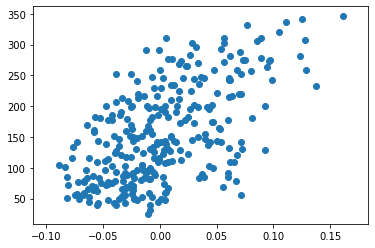

In [7]:
plt.scatter(x_train, y_train)

# Linear regression using scikit-learn

In [8]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
y_pred = lr.predict(x_test)
y_pred.shape

(148, 1)

In [10]:
print('Coefficients:', lr.coef_)
print('Mean squared error (MSE) on test set:', mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2) on test set:', r2_score(y_test, y_pred))

Coefficients: [[975.40444663]]
Mean squared error (MSE) on test set: 3891.300416804684
Coefficient of determination (R^2) on test set: 0.3158755200403638


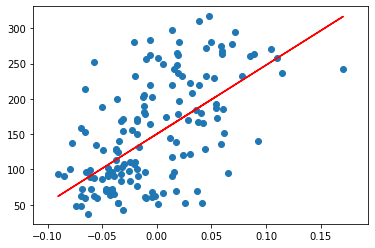

In [11]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='red')
plt.show()

# Linear regression using PyTorch

In [12]:
model = torch.nn.Sequential(
    torch.nn.Linear(1, 1)
)
loss_func = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.03)
x = torch.from_numpy(x_train.astype('float32'))
y = torch.from_numpy(y_train.astype('float32'))

In [13]:
for epoch in range(30000):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = loss_func(y_pred, y)
    loss.backward()
    optimizer.step()
    if epoch % 1000 == 0:
        print(f'epoch: {epoch}, loss: {loss}')

epoch: 0, loss: 28809.0859375
epoch: 1000, loss: 5536.26806640625
epoch: 2000, loss: 5146.61669921875
epoch: 3000, loss: 4849.6455078125
epoch: 4000, loss: 4623.31103515625
epoch: 5000, loss: 4450.81005859375
epoch: 6000, loss: 4319.33837890625
epoch: 7000, loss: 4219.13671875
epoch: 8000, loss: 4142.7685546875
epoch: 9000, loss: 4084.564697265625
epoch: 10000, loss: 4040.20458984375
epoch: 11000, loss: 4006.39453125
epoch: 12000, loss: 3980.62744140625
epoch: 13000, loss: 3960.989013671875
epoch: 14000, loss: 3946.021728515625
epoch: 15000, loss: 3934.614013671875
epoch: 16000, loss: 3925.919677734375
epoch: 17000, loss: 3919.29296875
epoch: 18000, loss: 3914.2431640625
epoch: 19000, loss: 3910.39453125
epoch: 20000, loss: 3907.4609375
epoch: 21000, loss: 3905.225830078125
epoch: 22000, loss: 3903.521240234375
epoch: 23000, loss: 3902.222412109375
epoch: 24000, loss: 3901.23291015625
epoch: 25000, loss: 3900.477783203125
epoch: 26000, loss: 3899.903076171875
epoch: 27000, loss: 3899.4

In [14]:
y_pred = model(torch.from_numpy(x_test.astype('float32'))).data.numpy()
y_pred.shape

(148, 1)

In [15]:
print('Coefficients:', [parameter.data.numpy()[0][0] for parameter in list(model.parameters())[:-1]])
print('Mean squared error (MSE) on test set:', mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2) on test set:', r2_score(y_test, y_pred))

Coefficients: [958.8308]
Mean squared error (MSE) on test set: 3885.7771048127624
Coefficient of determination (R^2) on test set: 0.3168465663589184


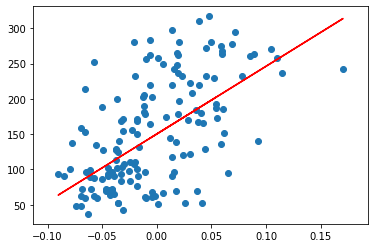

In [16]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='red')
plt.show()

# Linear regression using TensorFlow (Keras)

In [17]:
model = keras.Sequential([
    layers.Dense(1,  input_shape=[1])
])
optimizer = tf.keras.optimizers.SGD(0.03)
model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(x_train, y_train, epochs=10000, verbose=0)
df_history = pd.DataFrame(history.history)
df_history['epoch'] = history.epoch
df_history.tail()

,loss,mse,epoch
9995,3911.873459,3911.873291,9995
9996,3909.215286,3909.215088,9996
9997,3910.910983,3910.911133,9997
9998,3904.667505,3904.667480,9998
9999,3902.968627,3902.968506,9999


In [19]:
y_pred = model.predict(x_test)
y_pred.shape

(148, 1)

In [20]:
print('Coefficients:', model.layers[0].get_weights()[0][0])
print('Mean squared error (MSE) on test set:', mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2) on test set:', r2_score(y_test, y_pred))

Coefficients: [975.77246]
Mean squared error (MSE) on test set: 3872.8231647404987
Coefficient of determination (R^2) on test set: 0.31912398176408585


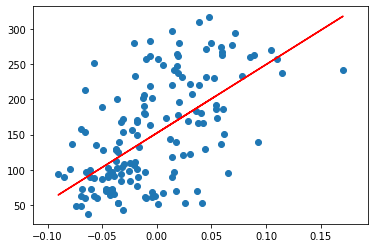

In [21]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='red')
plt.show()